<a href="https://colab.research.google.com/github/nissimlab/CIP-mouse-pancreas/blob/main/Nissim__2_Filtering_cleaning_cellbender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script 2 : filtering and cleaning post Cellbender
## Sample = XX_Sample_Name_XX


# Preliminaries

## Dependecy notebooks



* CellBender




# Setup

## link Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Installing packages on Colab

In [ ]:
# restart

#for python 3.7
#!pip install setuptools-scm install scanpy bbknn anndata leidenalg scrublet watermark pandas==1.1.5 umap-learn==0.5.3 plotnine==0.8.0 anndata==0.7.8 panel muon anndata2ri triku ray harmonypy celltypist

!pip install setuptools-scm install scanpy bbknn anndata leidenalg scrublet watermark pandas==1.1.5 umap-learn==0.5.3 plotnine==0.8.0 rpy2==3.4.5 anndata panel muon anndata2ri triku ray harmonypy celltypist
##for python>3.8
#pip install setuptools-scm install scanpy anndata leidenalg scrublet watermark pandas umap-learn plotnine==0.8.0 gseapy pybiomart git+https://github.com/saezlab/omnipath pip install git+https://github.com/saezlab/decoupler-py git+https://github.com/saezlab/dorothea-py.git install git+https://github.com/afvallejo/squidpy
#pandas==1.4.1 umap-learn==0.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 KB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 KB 26.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev libharfbuzz-gobject0
  liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev libsepol1-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev li

## Import packages

If you want modules to be automatically reloaded when you call them, use `autoreload`:

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse

import triku as tk
import re

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
from pathlib import Path
from ipywidgets import interactive

import celltypist
from celltypist import models

import muon as mu
from muon import prot as pt

%matplotlib inline


In [ ]:
%pprint
import time
timestr = time.strftime("%d%m%Y-%H%M%S")
print(timestr)

Pretty printing has been turned OFF
03022023-145805


In [ ]:
# R integration
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    # color_map="YlGnBu",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [ ]:
!Rscript -e "options(Ncpus = 8)"  -e "install.packages('BiocManager')" -e "install.packages('Seurat')"  -e "BiocManager::install(c('scry','scater','scDblFinder','BiocParallel'))"

Streaming output truncated to the last 5000 lines.
Creating a new generic function for ‘which.min’ in package ‘BiocGenerics’
Creating a new generic function for ‘which.max’ in package ‘BiocGenerics’
Creating a new generic function for ‘IQR’ in package ‘BiocGenerics’
Creating a new generic function for ‘mad’ in package ‘BiocGenerics’
Creating a new generic function for ‘xtabs’ in package ‘BiocGenerics’
Creating a new generic function for ‘basename’ in package ‘BiocGenerics’
Creating a new generic function for ‘dirname’ in package ‘BiocGenerics’
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (BiocGenerics)
begin installing package ‘pheatmap’
* installing *source* package ‘RcppHNSW’ ...
** package ‘RcppHNSW’ successfully unpacked and MD5 sums checked
** u

In [ ]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3


In [ ]:
%%R
library(scry)
library(Seurat)
library(scater)
library(scDblFinder)
library(BiocParallel)

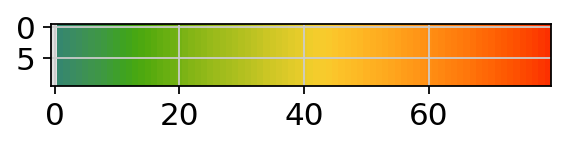

In [ ]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [ ]:
%cd /content/

/content


#Reproducibility

#Print package versions

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,anndata2ri,rpy2,triku

Last updated: 2023-02-03T14:58:48.957637+00:00

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
sklearn   : 0.0.post1
anndata   : 0.8.0
scanpy    : 1.9.1
muon      : 0.1.2
anndata2ri: 1.1
rpy2      : 3.4.5
triku     : 2.1.4

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.11.2
colorcet  : 3.0.1
re        : 2.2.1
matplotlib: 3.5.3
triku     : 2.1.4
muon      : 0.1.2
logging   : 0.5.1.2
scanpy    : 1.9.1
scipy     : 1.7.3
celltypist: 1.3.0
anndata2ri: 1.1
numpy     : 1.21.6
rpy2      : 3.4.5
pandas    : 1.1.5



## Set global parameters

Set some plotting parameters.

In [ ]:
sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1


Set other global parameters

In [ ]:
random_state=42 
# should figures just be displayed or also saved?
save_figure = False

# should cashed values be used, or recompute?
force_recompute = False

In [ ]:
#@title load accesory funtions
#@markdown
"""Functions for downstream work with outputs of remove-background."""

import tables
import numpy as np
import scipy.sparse as sp
from typing import Dict


def dict_from_h5(file: str) -> Dict[str, np.ndarray]:
    """Read in everything from an h5 file and put into a dictionary."""
    d = {}
    with tables.open_file(file) as f:
        # read in everything
        for array in f.walk_nodes("/", "Array"):
            d[array.name] = array.read()
    return d


def anndata_from_h5(file: str,
                    analyzed_barcodes_only: bool = True) -> 'anndata.AnnData':
    """Load an output h5 file into an AnnData object for downstream work.

    Args:
        file: The h5 file
        analyzed_barcodes_only: False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.

    Returns:
        adata: The anndata object, populated with inferred latent variables
            and metadata.

    """

    try:
        import anndata
    except ImportError:
        raise ImportError('The anndata package must be installed to use the '
                          'function anndata_from_h5()')

    d = dict_from_h5(file)
    X = sp.csc_matrix((d.pop('data'), d.pop('indices'), d.pop('indptr')),
                      shape=d.pop('shape')).transpose().tocsr()

    if analyzed_barcodes_only:
        if 'barcodes_analyzed_inds' in d.keys():
            X = X[d['barcodes_analyzed_inds'], :]
            d['barcodes'] = d['barcodes'][d['barcodes_analyzed_inds']]
        elif 'barcode_indices_for_latents' in d.keys():
            X = X[d['barcode_indices_for_latents'], :]
            d['barcodes'] = d['barcodes'][d['barcode_indices_for_latents']]
        else:
            print('Warning: analyzed_barcodes_only=True, but the key '
                  '"barcodes_analyzed_inds" or "barcode_indices_for_latents" '
                  'is missing from the h5 file. '
                  'Will output all barcodes, and proceed as if '
                  'analyzed_barcodes_only=False')

    # Construct the count matrix.
    adata = anndata.AnnData(X=X,
                            obs={'barcode': d.pop('barcodes').astype(str)},
                            var={'gene_name': (d.pop('gene_names') if 'gene_names' in d.keys()
                                               else d.pop('name')).astype(str)})
    adata.obs.set_index('barcode', inplace=True)
    adata.var.set_index('gene_name', inplace=True)

    # Add other information to the adata object in the appropriate slot.
    for key, value in d.items():
        try:
            value = np.asarray(value)
            if len(value.shape) == 0:
                adata.uns[key] = value
            elif value.shape[0] == X.shape[0]:
                if (len(value.shape) < 2) or (value.shape[1] < 2):
                    adata.obs[key] = value
                else:
                    adata.obsm[key] = value
            elif value.shape[0] == X.shape[1]:
                if value.dtype.name.startswith('bytes'):
                    adata.var[key] = value.astype(str)
                else:
                    adata.var[key] = value
            else:
                adata.uns[key] = value
        except Exception:
            print('Unable to load data into AnnData: ', key, value, type(value))

    if analyzed_barcodes_only:
        for col in adata.obs.columns[adata.obs.columns.str.startswith('barcodes_analyzed')
                                     | adata.obs.columns.str.startswith('barcode_indices')]:
            try:
                del adata.obs[col]
            except Exception:
                pass

    return adata


def load_anndata_from_input_and_output(input_file: str,
                                       output_file: str,
                                       analyzed_barcodes_only: bool = True,
                                       input_layer_key: str = 'cellranger') -> 'anndata.AnnData':
    """Load remove-background output count matrix into an anndata object,
    together with remove-background metadata and the raw input counts.

    Args:
        input_file: Raw h5 file used as input for remove-background.
        output_file: Output h5 file created by remove-background (can be
            filtered or not).
        analyzed_barcodes_only: Argument passed to anndata_from_h5().
            False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.
        input_layer_key: Key of the anndata.layer that is created for the raw
            input count matrix.

    Return:
        adata_out: AnnData object with counts before and after remove-background,
            as well as inferred latent variables from remove-background.

    """

    # Load input data.
    adata_raw = anndata_from_h5(input_file, analyzed_barcodes_only=False)

    # Load remove-background output data.
    adata_out = anndata_from_h5(output_file, analyzed_barcodes_only=analyzed_barcodes_only)

    # Subset the raw dataset to the relevant barcodes.
    adata_raw = adata_raw[adata_out.obs.index]

    # Put count matrices into 'layers' in anndata for clarity.
    adata_out.layers[input_layer_key] = adata_raw.X.copy()
    adata_out.layers['cellbender'] = adata_out.X.copy()

    # Pre-compute a bit of metadata.
    adata_out.var['n_cellranger'] = np.array(adata_out.layers['cellranger'].sum(axis=0)).squeeze()
    adata_out.var['n_cellbender'] = np.array(adata_out.layers['cellbender'].sum(axis=0)).squeeze()

    return adata_out

# load accesory funtions

In [ ]:
#@title
"""Functions for downstream work with outputs of remove-background."""

import tables
import numpy as np
import scipy.sparse as sp
from typing import Dict


def dict_from_h5(file: str) -> Dict[str, np.ndarray]:
    """Read in everything from an h5 file and put into a dictionary."""
    d = {}
    with tables.open_file(file) as f:
        # read in everything
        for array in f.walk_nodes("/", "Array"):
            d[array.name] = array.read()
    return d


def anndata_from_h5(file: str,
                    analyzed_barcodes_only: bool = True) -> 'anndata.AnnData':
    """Load an output h5 file into an AnnData object for downstream work.

    Args:
        file: The h5 file
        analyzed_barcodes_only: False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.

    Returns:
        adata: The anndata object, populated with inferred latent variables
            and metadata.

    """

    try:
        import anndata
    except ImportError:
        raise ImportError('The anndata package must be installed to use the '
                          'function anndata_from_h5()')

    d = dict_from_h5(file)
    X = sp.csc_matrix((d.pop('data'), d.pop('indices'), d.pop('indptr')),
                      shape=d.pop('shape')).transpose().tocsr()

    if analyzed_barcodes_only:
        if 'barcodes_analyzed_inds' in d.keys():
            X = X[d['barcodes_analyzed_inds'], :]
            d['barcodes'] = d['barcodes'][d['barcodes_analyzed_inds']]
        elif 'barcode_indices_for_latents' in d.keys():
            X = X[d['barcode_indices_for_latents'], :]
            d['barcodes'] = d['barcodes'][d['barcode_indices_for_latents']]
        else:
            print('Warning: analyzed_barcodes_only=True, but the key '
                  '"barcodes_analyzed_inds" or "barcode_indices_for_latents" '
                  'is missing from the h5 file. '
                  'Will output all barcodes, and proceed as if '
                  'analyzed_barcodes_only=False')

    # Construct the count matrix.
    adata = anndata.AnnData(X=X,
                            obs={'barcode': d.pop('barcodes').astype(str)},
                            var={'gene_name': (d.pop('gene_names') if 'gene_names' in d.keys()
                                               else d.pop('name')).astype(str)})
    adata.obs.set_index('barcode', inplace=True)
    adata.var.set_index('gene_name', inplace=True)

    # Add other information to the adata object in the appropriate slot.
    for key, value in d.items():
        try:
            value = np.asarray(value)
            if len(value.shape) == 0:
                adata.uns[key] = value
            elif value.shape[0] == X.shape[0]:
                if (len(value.shape) < 2) or (value.shape[1] < 2):
                    adata.obs[key] = value
                else:
                    adata.obsm[key] = value
            elif value.shape[0] == X.shape[1]:
                if value.dtype.name.startswith('bytes'):
                    adata.var[key] = value.astype(str)
                else:
                    adata.var[key] = value
            else:
                adata.uns[key] = value
        except Exception:
            print('Unable to load data into AnnData: ', key, value, type(value))

    if analyzed_barcodes_only:
        for col in adata.obs.columns[adata.obs.columns.str.startswith('barcodes_analyzed')
                                     | adata.obs.columns.str.startswith('barcode_indices')]:
            try:
                del adata.obs[col]
            except Exception:
                pass

    return adata


def load_anndata_from_input_and_output(input_file: str,
                                       output_file: str,
                                       analyzed_barcodes_only: bool = True,
                                       input_layer_key: str = 'cellranger') -> 'anndata.AnnData':
    """Load remove-background output count matrix into an anndata object,
    together with remove-background metadata and the raw input counts.

    Args:
        input_file: Raw h5 file used as input for remove-background.
        output_file: Output h5 file created by remove-background (can be
            filtered or not).
        analyzed_barcodes_only: Argument passed to anndata_from_h5().
            False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.
        input_layer_key: Key of the anndata.layer that is created for the raw
            input count matrix.

    Return:
        adata_out: AnnData object with counts before and after remove-background,
            as well as inferred latent variables from remove-background.

    """

    # Load input data.
    adata_raw = anndata_from_h5(input_file, analyzed_barcodes_only=False)

    # Load remove-background output data.
    adata_out = anndata_from_h5(output_file, analyzed_barcodes_only=analyzed_barcodes_only)

    # Subset the raw dataset to the relevant barcodes.
    adata_raw = adata_raw[adata_out.obs.index]

    # Put count matrices into 'layers' in anndata for clarity.
    adata_out.layers[input_layer_key] = adata_raw.X.copy()
    adata_out.layers['cellbender'] = adata_out.X.copy()

    # Pre-compute a bit of metadata.
    adata_out.var['n_cellranger'] = np.array(adata_out.layers['cellranger'].sum(axis=0)).squeeze()
    adata_out.var['n_cellbender'] = np.array(adata_out.layers['cellbender'].sum(axis=0)).squeeze()

    return adata_out

# Setup

## set WD

In [ ]:
folder='/content/drive/MyDrive/XX_Folder_Name_XX/'

samplename='XX_Sample_Name_XX'
import os

os.chdir(folder)
if not os.path.exists('./figures'):
    os.makedirs('./figures')

# read the data

In [ ]:
#load in raw barcodes
adata_raw=sc.read("/content/drive/MyDrive/XX_Folder_Name_XX/XX_Sample_Name_XX_raw.h5ad")
adata_raw


AnnData object with n_obs × n_vars = 1467980 × 32285
    var: 'gene_ids', 'feature_types'

In [ ]:
#load in cellbender data
adata = anndata_from_h5("/content/drive/MyDrive/XX_Folder_Name_XX/XX_Sample_Name_XX_cellbender.h5", analyzed_barcodes_only=False)
adata

AnnData object with n_obs × n_vars = 1467980 × 32285
    var: 'ambient_expression', 'feature_type', 'id'
    uns: 'barcode_indices_for_latents', 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_gene_encoding', 'latent_scale', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch'

In [ ]:
# Subset the raw dataset to the relevant barcodes.
input_layer_key= 'cellranger'

# Put count matrices into 'layers' in anndata for clarity.
adata.layers[input_layer_key] = adata_raw.X.copy()
adata.layers['cellbender'] = adata.X.copy()

# Pre-compute a bit of metadata.
adata.var['n_cellranger'] = np.array(adata.layers['cellranger'].sum(axis=0)).squeeze()
adata.var['n_cellbender'] = np.array(adata.layers['cellbender'].sum(axis=0)).squeeze()
adata

AnnData object with n_obs × n_vars = 1467980 × 32285
    var: 'ambient_expression', 'feature_type', 'id', 'n_cellranger', 'n_cellbender'
    uns: 'barcode_indices_for_latents', 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_gene_encoding', 'latent_scale', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch'
    layers: 'cellranger', 'cellbender'

In [ ]:
adata.obs['sample']=['XX_sample_XX']*adata.n_obs
adata.obs['donor']=['XX_donor_XX']*adata.n_obs
adata.obs['date']=['XX_date_XX']*adata.n_obs

In [ ]:
adata.var

,ambient_expression,feature_type,id,n_cellranger,n_cellbender
gene_name,,,,,
Xkr4,9.757111e-07,Gene Expression,ENSMUSG00000051951,148.0,133.0
Gm1992,2.428311e-07,Gene Expression,ENSMUSG00000089699,5.0,3.0
Gm19938,1.003905e-13,Gene Expression,ENSMUSG00000102331,11.0,9.0
Gm37381,1.113830e-14,Gene Expression,ENSMUSG00000102343,3.0,3.0
Rp1,9.807014e-14,Gene Expression,ENSMUSG00000025900,9.0,7.0
...,...,...,...,...,...
AC124606.1,0.000000e+00,Gene Expression,ENSMUSG00000095523,0.0,0.0
AC133095.2,0.000000e+00,Gene Expression,ENSMUSG00000095475,0.0,0.0
AC133095.1,0.000000e+00,Gene Expression,ENSMUSG00000094855,0.0,0.0


 # QC and filtering

## Filtering plots

In [ ]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

# compute qc metrics
regex = re.compile('^(MT-).*', re.IGNORECASE)
mito_genes = [l for l in adata.var_names for m in [regex.search(l)] if m]
adata.var['mito'] = False
adata.var.loc[mito_genes, 'mito'] = True
adata.obs['mt_frac'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
print('Found {} mito genes and annotated.'.format(len(mito_genes)))

sc.pp.calculate_qc_metrics(adata, qc_vars=['mito'], inplace=True)


adata

Found 13 mito genes and annotated.


AnnData object with n_obs × n_vars = 1467980 × 32285
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'ambient_expression', 'feature_type', 'id', 'n_cellranger', 'n_cellbender', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'barcode_indices_for_latents', 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_gene_encoding', 'latent_scale', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'training_elbo_per_epoch'
    layers: 'cellranger', 'cellbender'

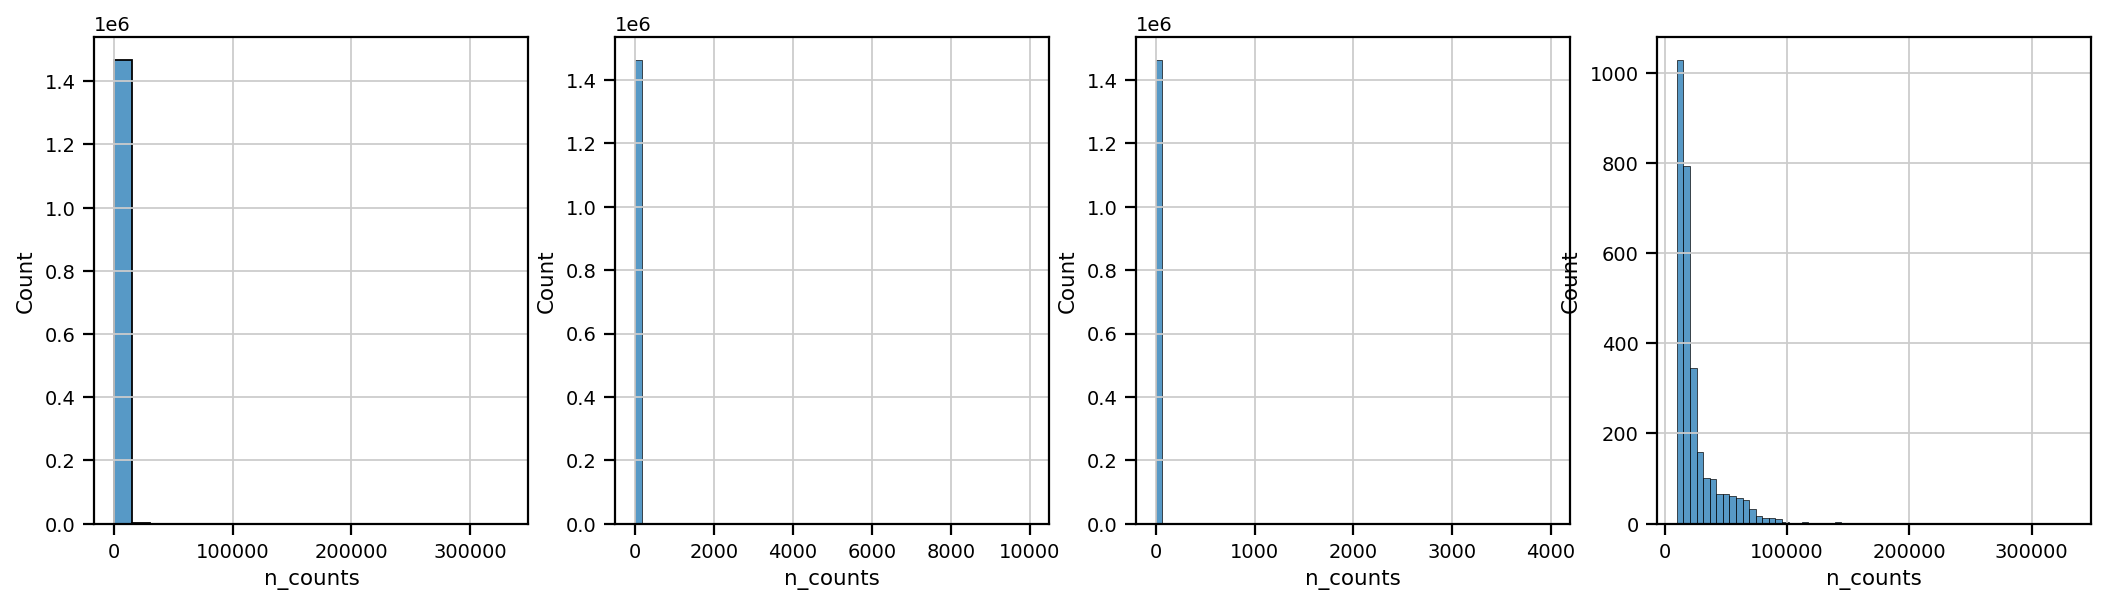

In [ ]:
sb.set_context('paper')
pl.rcParams['lines.linewidth'] = 0.1
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(16,4), gridspec_kw={'wspace':0.2})

ax1_dict = sb.histplot(adata.obs['n_counts'], kde=False, ax=ax1,)
ax2_dict =  sb.histplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60, ax=ax2,)
ax3_dict =  sb.histplot(adata.obs['n_counts'][adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax3,)
ax4_dict = sb.histplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax4, )
savefig='figures/'+ samplename + '_1_QC_counts_filtering.pdf'
fig.savefig(savefig, dpi=300, bbox_inches='tight')

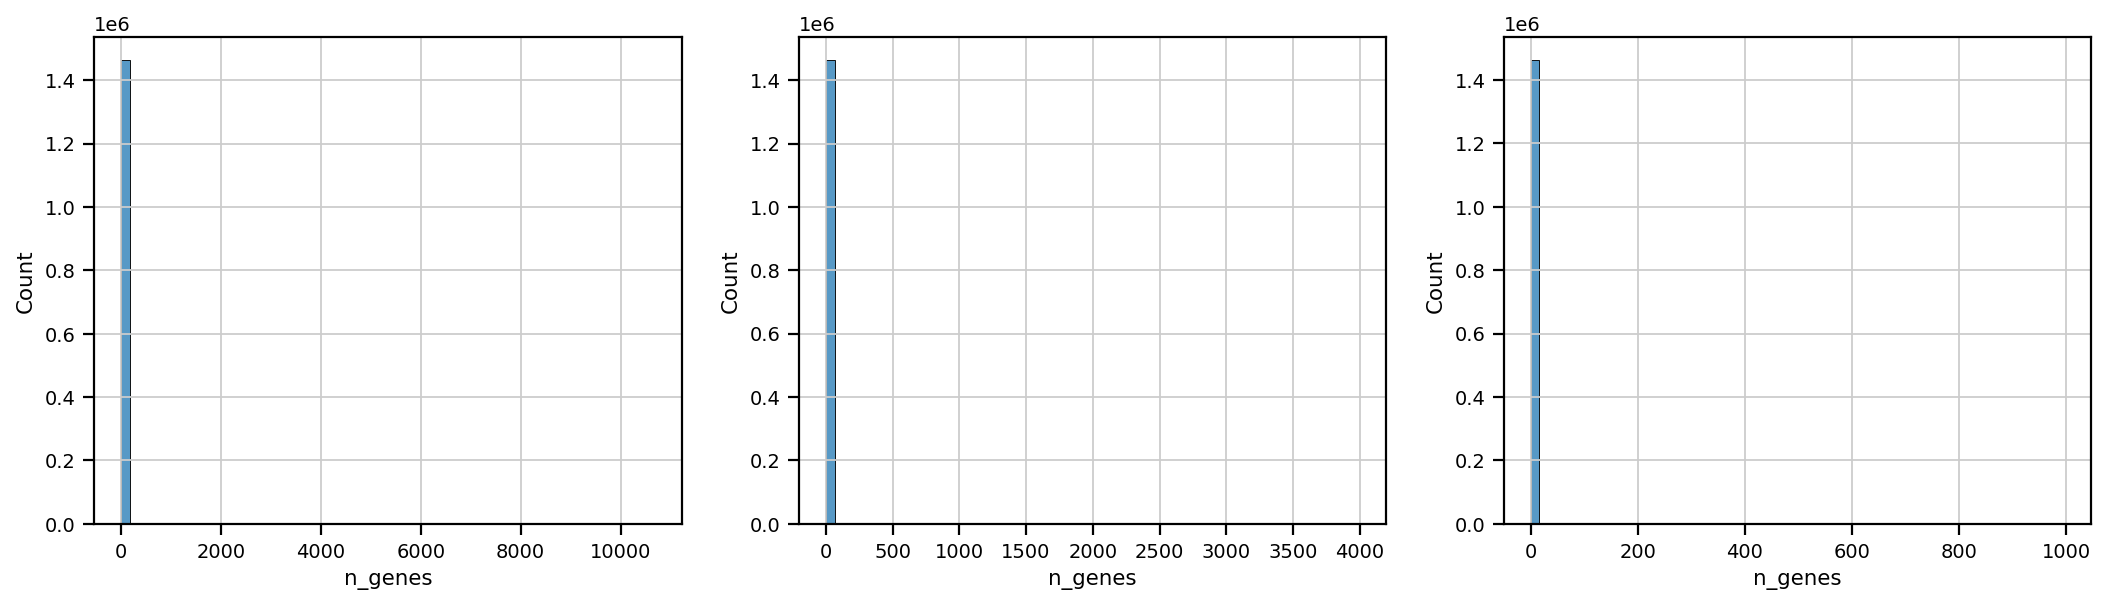

In [ ]:
sb.set_context('paper')
pl.rcParams['lines.linewidth'] = 0.1
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4), gridspec_kw={'wspace':0.2})

ax1_dict = sb.histplot(adata.obs['n_genes'], kde=False, bins=60, ax=ax1,)
ax2_dict =  sb.histplot(adata.obs['n_genes'][adata.obs['n_genes']<4000], kde=False, bins=60, ax=ax2,)
ax3_dict =  sb.histplot(adata.obs['n_genes'][adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax3,)
savefig='figures/'+ samplename + '_2_QC_gene_filtering.pdf'
fig.savefig(savefig, dpi=300, bbox_inches='tight')

## Filtering

In [ ]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_counts = 500)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.4]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 50)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 1467980
Number of cells after min count filter: 4971
Number of cells after MT filter: 4889
Number of cells after gene filter: 4888


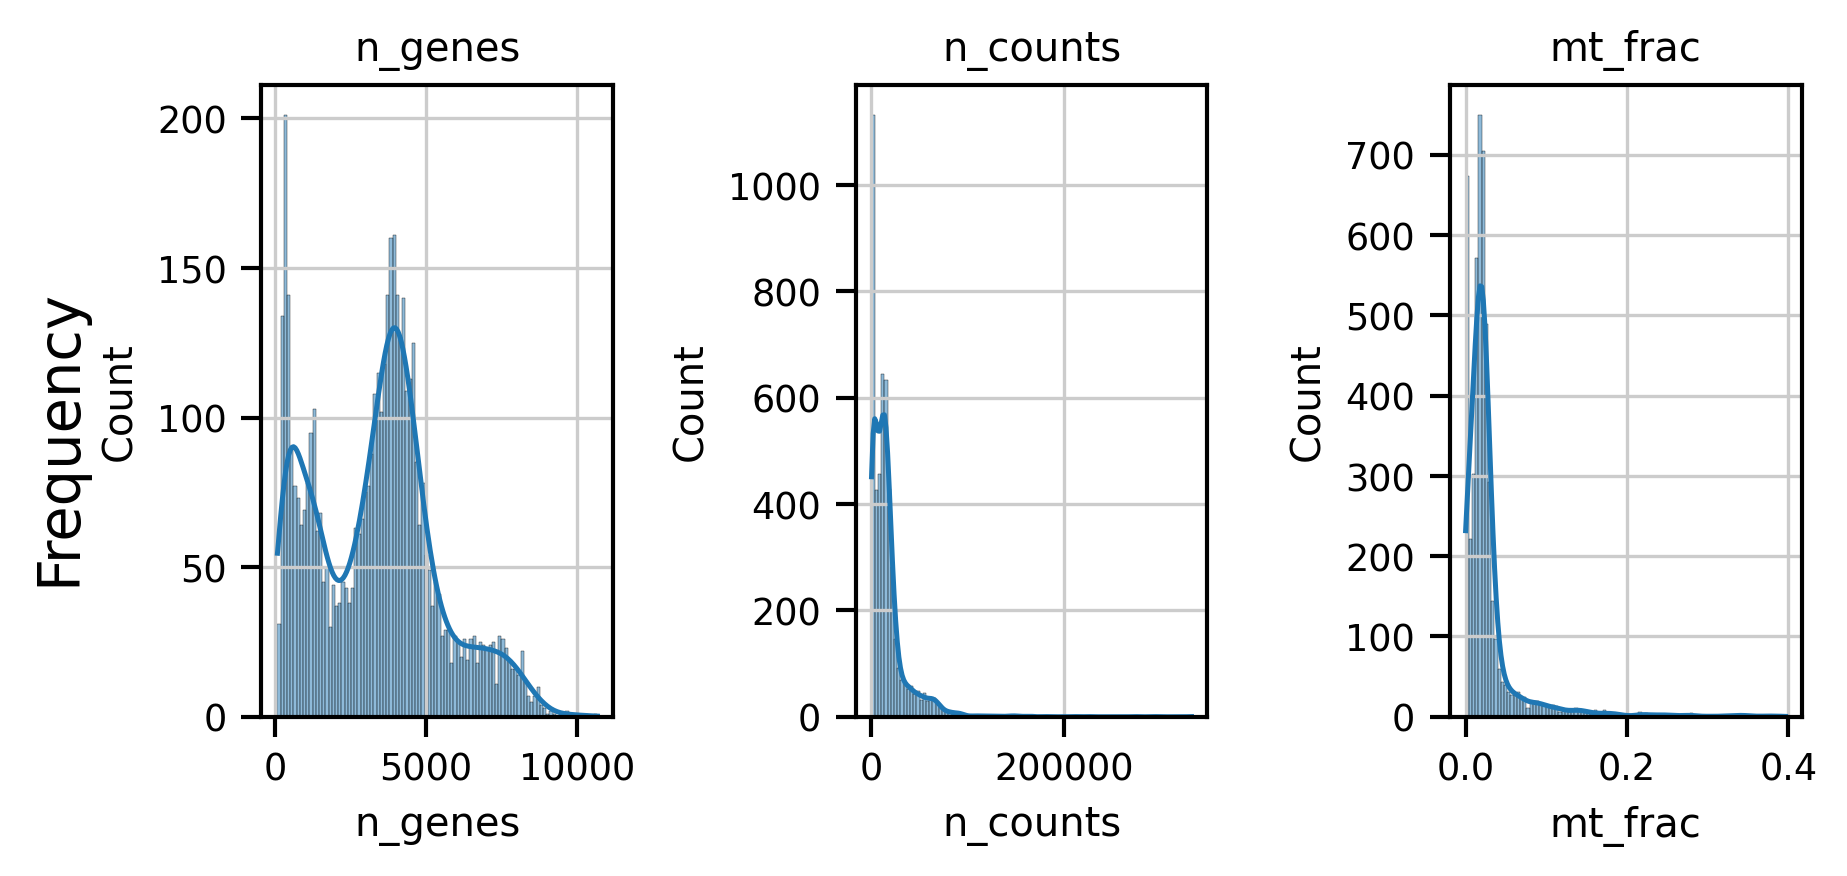

In [ ]:
sb.set_context('paper')


fig, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize=(6, 3), dpi=150, sharey=False)
adata.obs['n_genes']

sb.histplot( adata.obs['n_genes'], ax=ax1, kde=True, bins=100)
sb.histplot( adata.obs['n_counts'], ax=ax2, kde=True, bins=100)
sb.histplot( adata.obs['mt_frac'], ax=ax3, kde=True, bins=100)

ax1.title.set_text('n_genes')
ax2.title.set_text('n_counts')
ax3.title.set_text('mt_frac')

fig.text(0.00, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')

fig.tight_layout()

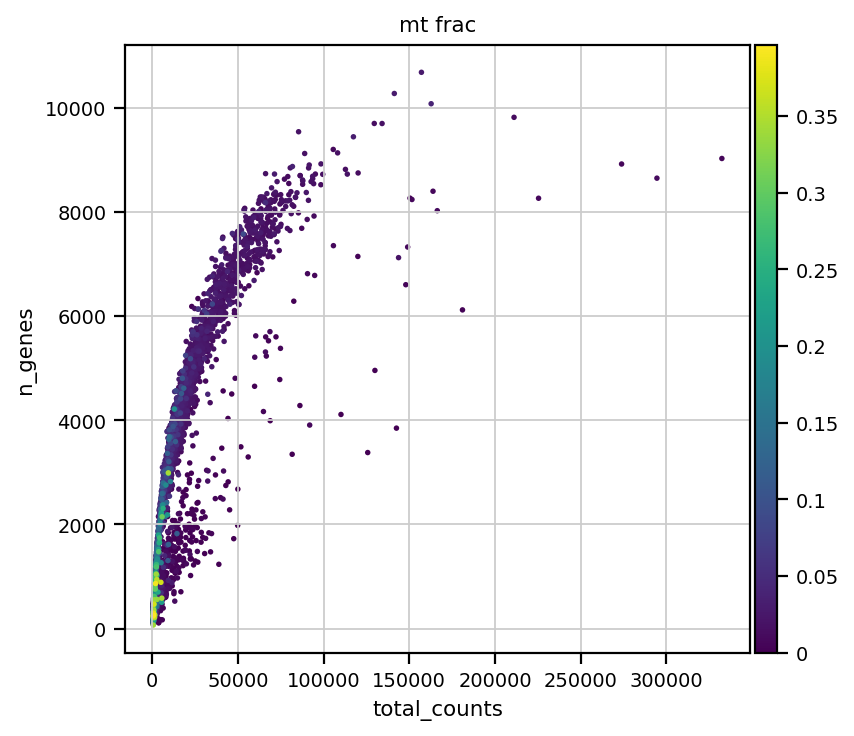

In [ ]:
# plot percentage of mitochondtial genes versus count depth and n_genes
sb.set_context('paper')
pl.rcParams['figure.figsize']=(5,5) #rescale figures
savefig='_' + samplename + '_4_QC_saturationplot.pdf'
sc.pl.scatter(adata, x='total_counts', y='n_genes', color='mt_frac', save=savefig)
plt.savefig("figures/"+ samplename + '_4_QC_saturationplot.pdf', bbox_inches="tight")

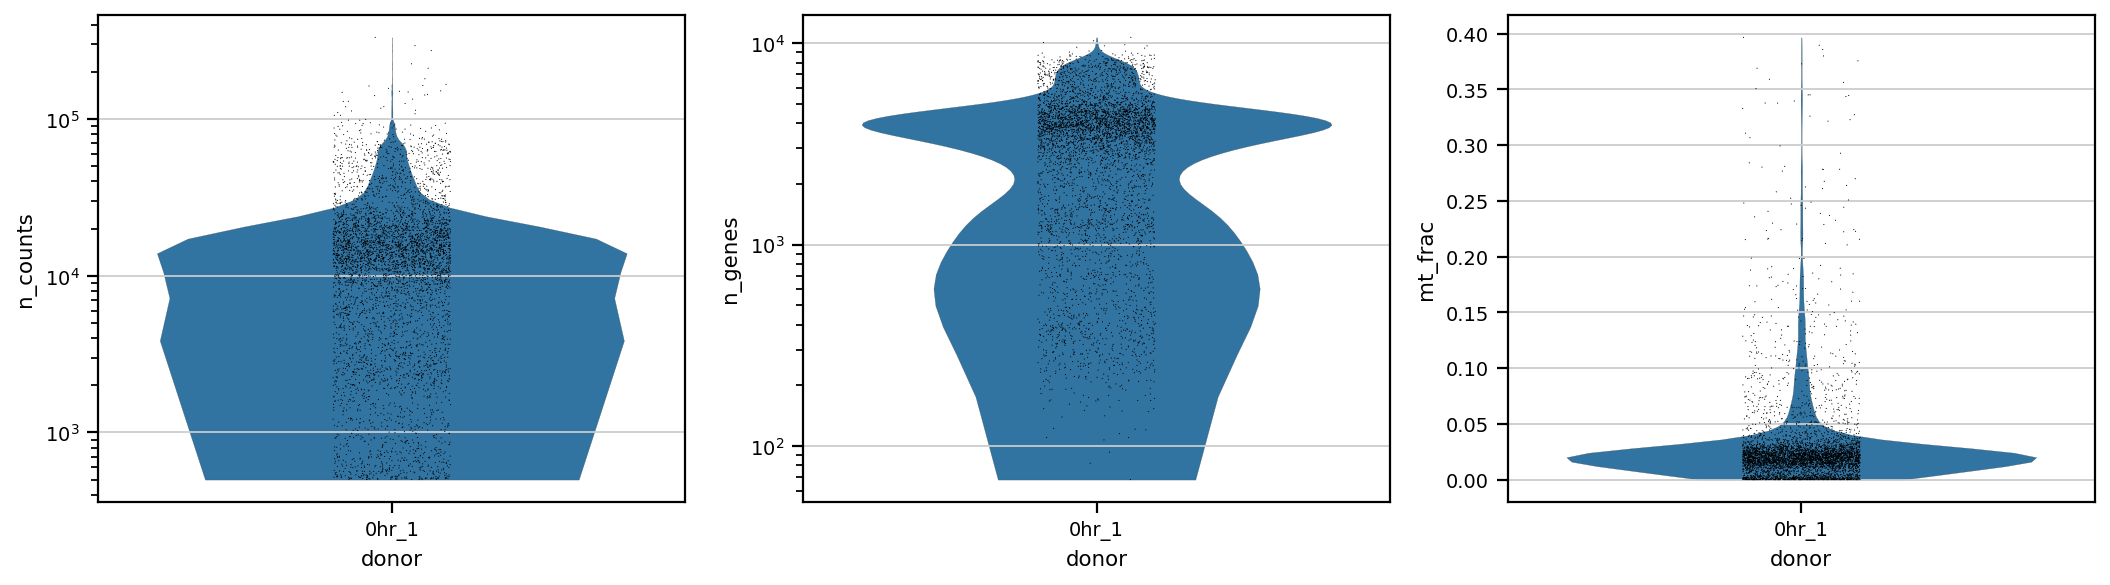

In [ ]:
sb.set_context('paper')
pl.rcParams['lines.linewidth'] = 0.1
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4), gridspec_kw={'wspace':0.2})

ax1_dict = sc.pl.violin(adata, 'n_counts', groupby='donor', size=0.5, log=True, cut=0, ax=ax1, show=False)
ax2_dict =  sc.pl.violin(adata, 'n_genes', groupby='donor', size=0.5, log=True, cut=0, ax=ax2, show=False)
ax3_dict = sc.pl.violin(adata, 'mt_frac', groupby='donor',size=0.5, ax=ax3, show=False,)
savefig='figures/'+ samplename + '_5_QC_violin_plots.pdf'
fig.savefig(savefig, dpi=300, bbox_inches='tight')

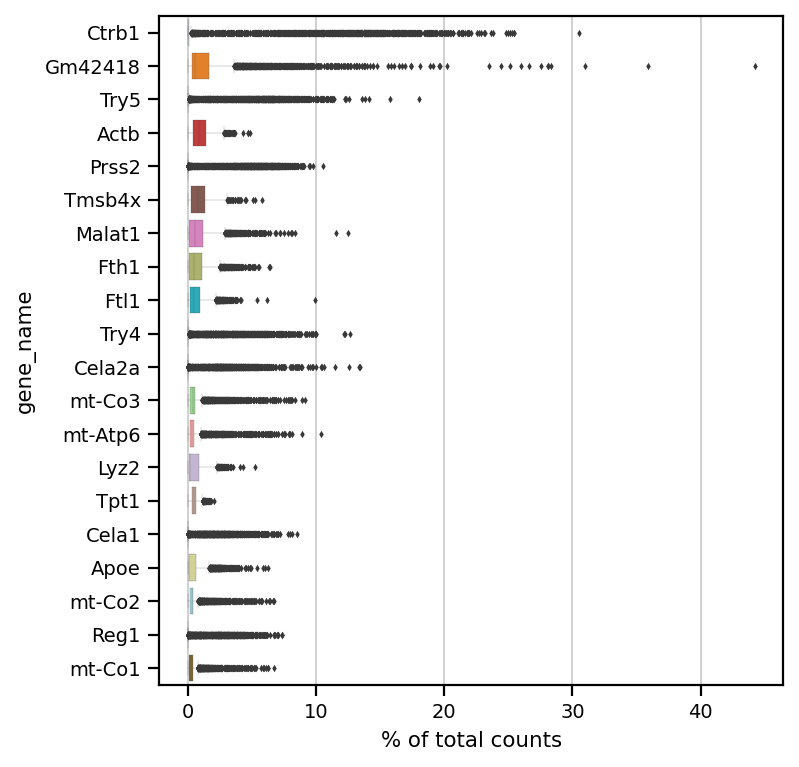

In [ ]:
sb.set_context('paper')
pl.rcParams['lines.linewidth'] = 0.1
savefig='_' + samplename + '_6_QC_highest_expr_genes.pdf'
sc.pl.highest_expr_genes(adata, n_top=20,save=savefig,)

In [ ]:
print(adata.obs['donor'].value_counts())

0hr_1    4888
Name: donor, dtype: int64


In [ ]:
adata.obs['n_counts'].sum()/adata.obs['donor'].value_counts()

0hr_1    17013.977087
Name: donor, dtype: float64

In [ ]:
adata.obs['n_counts'].sum()

83164320.0

#Doublet identification

## scDblFinder

In [ ]:
data_mat = adata.X.T

In [ ]:
%%R -i data_mat -o droplet_class

set.seed(123)
sce = scDblFinder(
    SingleCellExperiment(
        list(counts=data_mat),
    ) 
)
droplet_class = sce$scDblFinder.class

In [ ]:
adata.obs["scDblFinder_class"] = droplet_class
adata.obs.scDblFinder_class.value_counts()

singlet    4493
doublet     395
Name: scDblFinder_class, dtype: int64

In [ ]:
adata.write(samplename+"_clean.h5ad")

## remove doublets

In [ ]:
adata2 = adata[adata.obs.predicted_doublet == False]
adata2

View of AnnData object with n_obs × n_vars = 4835 × 32285
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet'
    var: 'ambient_expression', 'feature_type', 'id', 'n_cellranger', 'n_cellbender', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'barcode_indices_for_latents', 'contamination_fraction_params', 'fraction_data_used_for_testing', 'lambda_multiplier', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_gene_encoding', 'latent_scale', 'overdispersion_mean_and_scale', 'target_false_positive_rate', 'test_elbo', 'test_epoch', 'tr

## Export H5AD

In [ ]:
clean=samplename+"_clean.h5ad"
adata.write(clean)



In [ ]:
clean_Ndoublets=samplename+"_clean_noDoublets.h5ad"
adata2.write(clean_Ndoublets)